<a href="https://colab.research.google.com/github/kiki4510/Sprint-Challenge/blob/main/Section2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##라이브러리 설치

In [1]:
!pip install --upgrade scikit-learn==0.24.1

     |████████████████████████████████| 22.3 MB 2.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 82 kB 255 kB/s 


In [3]:
!pip install -U pandas-profiling

     |████████████████████████████████| 261 kB 5.0 MB/s 
     |████████████████████████████████| 596 kB 24.0 MB/s 
     |████████████████████████████████| 675 kB 47.5 MB/s 
     |████████████████████████████████| 62 kB 775 kB/s 
     |████████████████████████████████| 10.1 MB 43.4 MB/s 
     |████████████████████████████████| 3.1 MB 52.9 MB/s 
     |████████████████████████████████| 102 kB 11.4 MB/s 
     |████████████████████████████████| 812 kB 61.4 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=8a7b921f84ff99413cbbd4e5218c67c399b70f566124069c951662f73769bd9b
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=2d150df3ddbd3e1fa6f6e5a623d6e144eab640e30682b8fdfd4bbf3ce8346500
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e

In [4]:
pip install eli5

     |████████████████████████████████| 106 kB 5.1 MB/s 


In [5]:
! pip install pdpbox

     |████████████████████████████████| 34.0 MB 39 kB/s 
     |████████████████████████████████| 13.1 MB 6.5 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=cb65ef111474c9dc5f959cdddc1e388e61331667086d9c96fe3570fded3040b2
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
!pip install shap

     |████████████████████████████████| 371 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509233 sha256=1704d0bcd30762dc2ea93aeaf5b45c2a6c4f6749e15cafd37e30ef397b8bb244
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


#**데이터 불러오기**
* 항공사 만족도 조사에 관한 데이터
* 항공사 서비스 만족도에 어떠한 요인들이 영향을 주는가를 알고자 해서 해당 데이터를 분석하게 되었습니다.
* 고객이 항공사 전반적인 서비스에 만족인지 불만족인지를 예측하는 분류문제

##시나리오와 가설
* 시나리오 : 어떤 요인들을 개선해야 고객만족도를 높일 수 있을까? > 여러 feature들을 조사한 후에 만족도 조사를 실행한 Data
* 가설 : 항공사에서 고객 만족도를 높이기위해서 어떤 요인을 개선해야할지 알고싶다.(needs)

In [2]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.iloc[:,1:]
test = test.iloc[:,1:]

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**Data wrangling**
* train dataset과 test dataset에 똑같은 작업의 wrangling 진행
* 타겟은 고객 만족도를 구하는 것임으로 기존 satisfaction을 좀 더 구분하기 쉽게  Satisfaction feature를 새로 생성해준다.(True값은 만족 False값은 불만족을 뜻한다)
* 연착시간 feature들을 시간단위가 아닌 연착 유무에 따라서 새로운 feature를 생성해준다.
* 비행거리에 따라서 Short haul,Long haul을 나누어준다.(mile기준/1800mile) => 새로운 feature 생성

In [32]:
train.isna().sum().sort_values()
test.isna().sum().sort_values()
#Arrival Delay in Minutes 컬럼의 na값 존재 > 0으로 대체

id                                    0
satisfaction                          0
Departure Delay in Minutes            0
Cleanliness                           0
Inflight service                      0
Checkin service                       0
Baggage handling                      0
Leg room service                      0
On-board service                      0
Inflight entertainment                0
Seat comfort                          0
Departure Delay                       0
Online boarding                       0
Gate location                         0
Ease of Online booking                0
Departure/Arrival time convenient     0
Inflight wifi service                 0
Flight Distance                       0
Class                                 0
Type of Travel                        0
Age                                   0
Customer Type                         0
Gender                                0
Food and drink                        0
Arrival Delay                         0


In [38]:
train = train.fillna(0)
test = test.fillna(0)
train = train.drop_duplicates()
test = test.drop_duplicates()

In [39]:
dic = {True : 1, False : 0 }
train['Departure Delay in Minutes'].value_counts()
train['Departure Delay'] =[dic[t] for t in list(train['Departure Delay in Minutes']>0)]
train['Arrival Delay in Minutes'].value_counts()
train['Arrival Delay'] =[dic[t] for t in list(train['Arrival Delay in Minutes']>0)]
train['Satisfaction']=train['satisfaction']=='satisfied'
test['Departure Delay'] =[dic[t] for t in list(test['Departure Delay in Minutes']>0)]
test['Arrival Delay'] =[dic[t] for t in list(test['Arrival Delay in Minutes']>0)]
target ='Satisfaction'

In [40]:
#target의 비율을 알아본다
#만족 불만족이 비슷한 비율로 구성되어 있음으로 모델 형성에 큰 차질이 없을 것 이다.
train['Satisfaction'].value_counts(normalize=True)

False    0.566667
True     0.433333
Name: Satisfaction, dtype: float64

In [41]:
dici = {True : 'Long', False : 'Short' }
train['Haul'] =[dici[t] for t in list(train['Flight Distance']>1800)]

#**Data의 시각화**
* 각 feature들과 target의 관계를 시각화 해본다.

In [42]:
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Departure Delay', 'Arrival Delay', 'Satisfaction',
       'Haul'],
      dtype='object')

In [16]:
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
%matplotlib inline

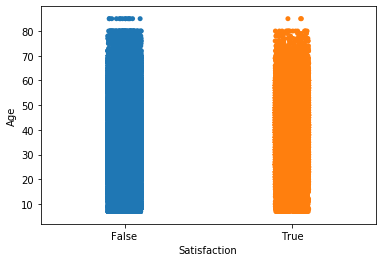

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.stripplot(y = train['Age'], x = train['Satisfaction'])
#연령과 만족도를 시각화 해보면 크게 이산된 분포를 보이지 않는다 > 연령feature를 모델에 사용하지 않을 수 있는 근거

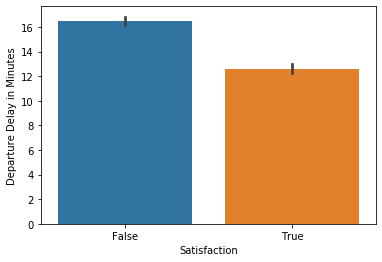

In [26]:
sns.barplot(x = train['Satisfaction'], y = train['Departure Delay in Minutes'])
#출발 연착시간이 늘어날수록 좀더 높은 불만족도를 보인다 > 'Departure Delay in Minutes'feature를 모델에 사용

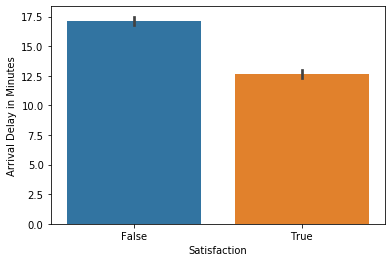

In [27]:
sns.barplot(x = train['Satisfaction'], y = train['Arrival Delay in Minutes'])
#도착 연착시간이 늘어날수록 좀더 높은 불만족도를 보인다 > 'Arrival Delay in Minutes'feature를 모델에 사용

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


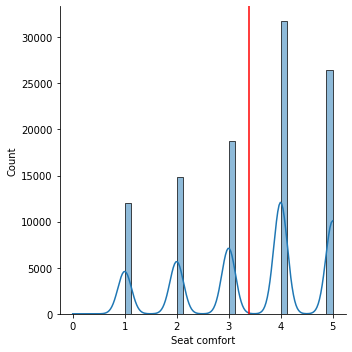

In [30]:
sns.displot(train['Seat comfort'],kde=True);
plt.axvline(3.4, color='red');

In [66]:
size_by_class = train.groupby(['Class','Satisfaction']).size()
Class = size_by_class.unstack()
Class = Class.reset_index()
#높은 클래스의 좌석일수록 비교적 만족도가 높아진다 

Satisfaction,Class,False,True
0,Business,12126,27548
1,Eco,30484,6967
2,Eco Plus,4505,1493


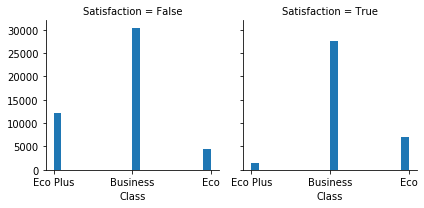

In [70]:
g = sns.FacetGrid(train, col='Satisfaction')
g.map(plt.hist, 'Class', bins=20)

In [74]:
size_by_ctype = train.groupby(['Customer Type','Satisfaction']).size()
Ctype = size_by_ctype.unstack()
Ctype = Ctype.reset_index()
Ctype

Satisfaction,Customer Type,False,True
0,Loyal Customer,35555,32441
1,disloyal Customer,11560,3567


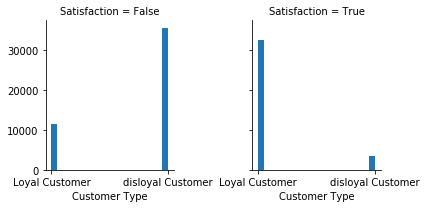

In [73]:
g = sns.FacetGrid(train, col='Satisfaction')
g.map(plt.hist, 'Customer Type', bins=20)
#회원과 비회원 유무에 따라서 만족도는 달라진다

In [77]:
size_by_tot = train.groupby(['Type of Travel','Satisfaction']).size()
tot = size_by_tot.unstack()
tot = tot.reset_index()
tot

Satisfaction,Type of Travel,False,True
0,Business travel,23911,33366
1,Personal Travel,23204,2642


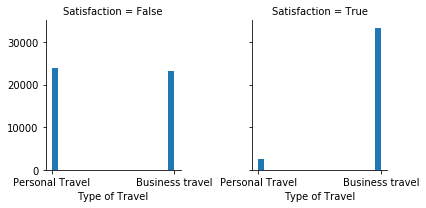

In [78]:
g = sns.FacetGrid(train, col='Satisfaction')
g.map(plt.hist, 'Type of Travel', bins=20)
#여행 목적에 따라 만족도 평가에 영향을 준다

#**Train data를 훈련세트와 검증세트로 나누기**
* a_feature는 모델에 사용할 범주형 feature들만을 모은 feature 집합이다.
* b_feature는 연착시간feature를 연속형으로 그대로 사용한 feature 집합이다.

In [79]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2, random_state=2)
train.shape, val.shape

((66498, 28), (16625, 28))

In [80]:
a_features = ['Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay', 'Arrival Delay','Haul']
b_features = ['Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','Haul']
target = 'Satisfaction'

#**모델 만들기**
1. 분류모델인 Randomforestclassifier와 xgboost 사용
2. 두 베이스 라인을 선택후에 성능 비교를 실행(성능지표 선택)
3. 하이퍼 마라미터 조정후에 최적의 모델을 선정
4. 최적의 모델들을 각각의 모델 별로 성능 비교

##**범주형 데이터만을 가지고 모델만들기**


In [94]:
X_train =  train[a_features]
y_train = train[target]
X_val = val[a_features]
y_val = val[target]
#훈련데이터와 검증데이터 선언

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier())#베이스 모델
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Customer Type', 'Type of Travel',
                                      'Class', 'Haul'],
                                mapping=[{'col': 'Customer Type',
                                          'data_type': dtype('O'),
                                          'mapping': disloyal Customer    1
Loyal Customer       2
NaN                 -2
dtype: int64},
                                         {'col': 'Type of Travel',
                                          'data_type': dtype('O'),
                                          'mapping': Business travel    1
Personal Travel    2
NaN               -2
dtype: int64},
                                         {'col': 'Class',
                                          'data_type': dtype('O'),
                                          'mapping': Business    1
Eco         2
Eco Plus    3
NaN        -2
dtype: int64},
                                         {'col': 'Ha

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))
#베이스라인의 검증정확도 확인 > 검증정확도가 매우 높게 측정 > Dataleakage 가능성 有
#모델 파이프라인을 확인했을때 인코딩에서 과정이 진행된 경우 아닌경우 때문에 발생한 데이터 누수로 추정된다

검증 정확도:  0.9612631578947368
              precision    recall  f1-score   support

       False       0.98      0.96      0.97      9648
        True       0.94      0.97      0.95      6977

    accuracy                           0.96     16625
   macro avg       0.96      0.96      0.96     16625
weighted avg       0.96      0.96      0.96     16625



In [98]:
pipe.named_steps
enc = pipe.named_steps['ordinalencoder']
encoded = enc.transform(X_val)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = pipe.predict(encoded)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))
#검증데이터셋도 인코딩을 진행해주니 검증정확도가 낮아진걸 확인할 수 있다.(Data leakage 해결)

검증 정확도:  0.7702857142857142
              precision    recall  f1-score   support

       False       0.92      0.74      0.82     11707
        True       0.58      0.84      0.68      4918

    accuracy                           0.77     16625
   macro avg       0.75      0.79      0.75     16625
weighted avg       0.82      0.77      0.78     16625

